# Implementing Linear Regression from scratch using gradient descent


## Recipe for any machine learning algorithm:
* Data_Set
* Model
* Optimization Procedure
* A cost function/objective function

##### We can choose any dataset with x, y values
##### Our Chosen Model for today is Linear Regression
##### Optimization Algorithm is Gradient descnet 
##### Cost function is Total Sum of Square Error (TSSE)


# Import dependancies

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style, cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

### Initialize the parameters

In [2]:
iteration_num =200
b = 10   # initial value for intercept
m = 10   # initial value for slope
learningRate = 0.01  ### The learning_rate for updating slope and intercept

x = []#creating list for x values
y = []#creating list for y values
b_list = list()
m_list=list()

### Read-in our dataset

In [3]:
csvfile =  open(r"Book1.csv")# select data source
reader = csv.reader(csvfile)
data = list(reader)
csvfile.close()

In [4]:
for k,l in data: # this loop will read every line in the data list and 
                 #will append the 1st value to x-list and the 2nd to y-list
        x.append(float(k))
        y.append(float(l))
print('Xs: ',x)
print('Ys: ',y)

Xs:  [0.0, -2.0, 0.0, 2.0]
Ys:  [2.0, 0.0, -2.0, 0.0]


### Start calculating:
!["error"](TSSE.png "TSSE")
!["derivative"](Derivative.png "d")
!["sgd"](sgd.jpg "sgd")


In [5]:
for i in range (0, iteration_num):
        db = 0.0
        dm = 0.0
        totalError = 0.0
        for g in range(0, len(data)):
            totalError += ((y[g] - (m * x[g] + b)) ** 2)#computing the total error for each data point given values of slope and intercept
            db += -(y[g] - (m * x[g] + b))#calculating the derivative for the intercept at each x,y point and summing them up
            dm += -x[g] * (y[g] - (m * x[g] + b))#calculating the derivative for the slope at each x,y point and summing them up
        b +=  - (learningRate * db) #updating the intercept
        m +=  - (learningRate * dm) #updating the slope
        m_list.append(m)
        b_list.append(b)
        print('Predicted line n: ',i+1,'TSSE: '+str(totalError),'b: ',"%.2f" % b,'m: ',"%.2f" % m)


Predicted line n:  1 TSSE: 1208.0 b:  9.60 m:  9.20
Predicted line n:  2 TSSE: 1053.76 b:  9.22 m:  8.46
Predicted line n:  3 TSSE: 920.8529919999999 b:  8.85 m:  7.79
Predicted line n:  4 TSSE: 806.1871169535998 b:  8.49 m:  7.16
Predicted line n:  5 TSSE: 707.1309301035826 b:  8.15 m:  6.59
Predicted line n:  6 TSSE: 621.443817775506 b:  7.83 m:  6.06
Predicted line n:  7 TSSE: 547.2170130558125 b:  7.51 m:  5.58
Predicted line n:  8 TSSE: 482.82358935091906 b:  7.21 m:  5.13
Predicted line n:  9 TSSE: 426.87605926225973 b:  6.93 m:  4.72
Predicted line n:  10 TSSE: 378.1904165335442 b:  6.65 m:  4.34
Predicted line n:  11 TSSE: 335.7556368820003 b:  6.38 m:  4.00
Predicted line n:  12 TSSE: 298.7078042680176 b:  6.13 m:  3.68
Predicted line n:  13 TSSE: 266.30815677979297 b:  5.88 m:  3.38
Predicted line n:  14 TSSE: 237.92445435996802 b:  5.65 m:  3.11
Predicted line n:  15 TSSE: 213.01516208364256 b:  5.42 m:  2.86
Predicted line n:  16 TSSE: 191.11602015415286 b:  5.20 m:  2.63
P

### Visualizing cost function

In [6]:
def error(m, b, data):
   totalError = 0
   for i in range(len(data)):
       totalError += (y[i] - (m * x[i] + b)) ** 2
   return totalError


In [7]:
def error_list(m, b, data):
   totalError = 0
   err_list=[]
   for j in range(len(m)):   
        for i in range(len(data)):
           totalError += (y[i] - (m[i] * x[i] + b[i])) ** 2
        err_list.append(totalError)
   return err_list
print(len(error_list(m_list,b_list,data)))


200


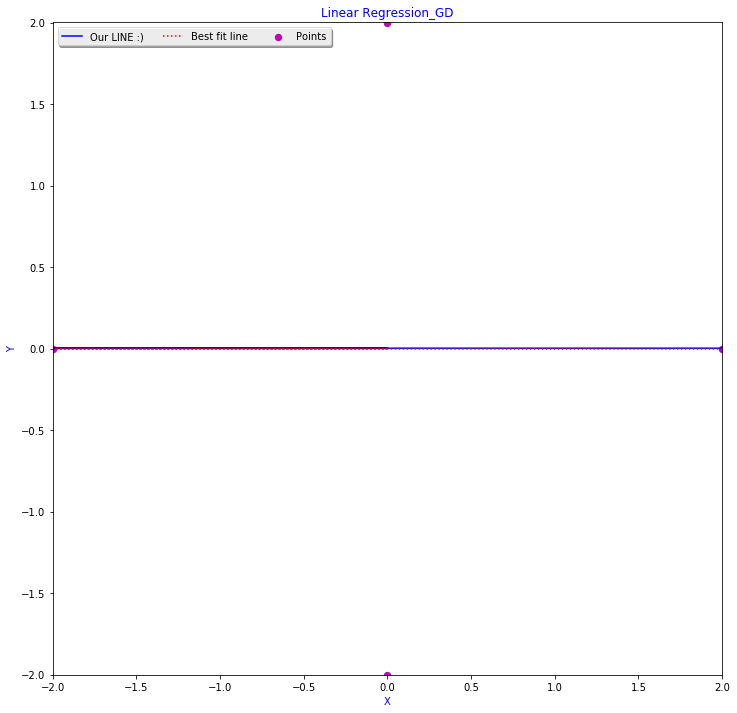

In [8]:
        #______plots_______#
fig1 = plt.figure(1,figsize=(12, 12)) # initialize the graph window        
graph1 = fig1.add_subplot(1, 1, 1)
graph1.autoscale(enable=True, axis='both', tight=True)
graph1.scatter(x,y, label='Points', color='m', s=40, marker='o')
graph1.set_title('Linear Regression_GD', color='Blue')
graph1.set_xlabel("X", color='blue')
graph1.set_ylabel("Y", color='blue')
graph1.autoscale(enable=True, axis='both', tight=False)
xx = np.asarray(x, dtype=float)
# labels = ('Predicted line at iteration n: ', i, 'TSSE: ', "%.2f" % totalError, 'b: ', "%.2f" %b, 'm: ',
#                           "%.2f" % m)
graph1.plot(xx, m * xx + b, ls='solid', c='b',label='Our LINE :)')
mmm, bbb = np.polyfit(x,y, 1)  ### Calculate m and b for the direct calculation of regression
graph1.plot(xx, mmm * xx + bbb, ls='dotted', c='r', label='Best fit line')
graph1.legend(loc='upper left', ncol=3, fancybox=True, shadow=True)
plt.show()

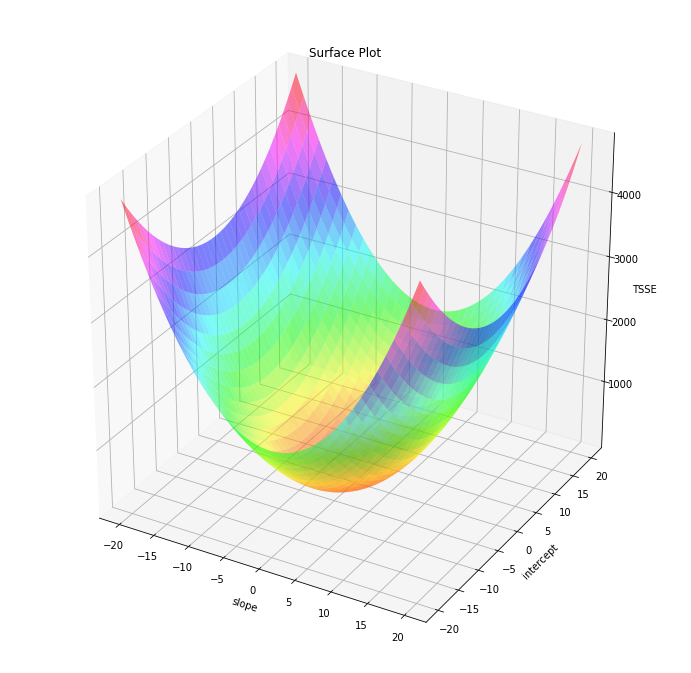

In [9]:
#Generating M,B,Z values for the contour and surface plots.
ms = np.linspace((mmm-20), (mmm+20), 75)
bs = np.linspace((bbb-20),( bbb+20), 75)
M, B = np.meshgrid(ms, bs)
zs = np.array([error(mp, bp, data)
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
zzzz= error_list(m_list,b_list,data)
Z = zs.reshape(M.shape)
fig2 = plt.figure(2,figsize=(12,12))
surface = fig2.add_subplot(111, projection='3d', facecolor='white',)
surface.plot_surface(M, B, Z, cmap=cm.hsv, alpha=0.5)
#surface.scatter(m_list,b_list,zzzz,c='k',s=35)
surface.set_xlabel('slope')
surface.set_ylabel('intercept')
surface.set_zlabel('TSSE')
surface.set_title('Surface Plot')
plt.show()

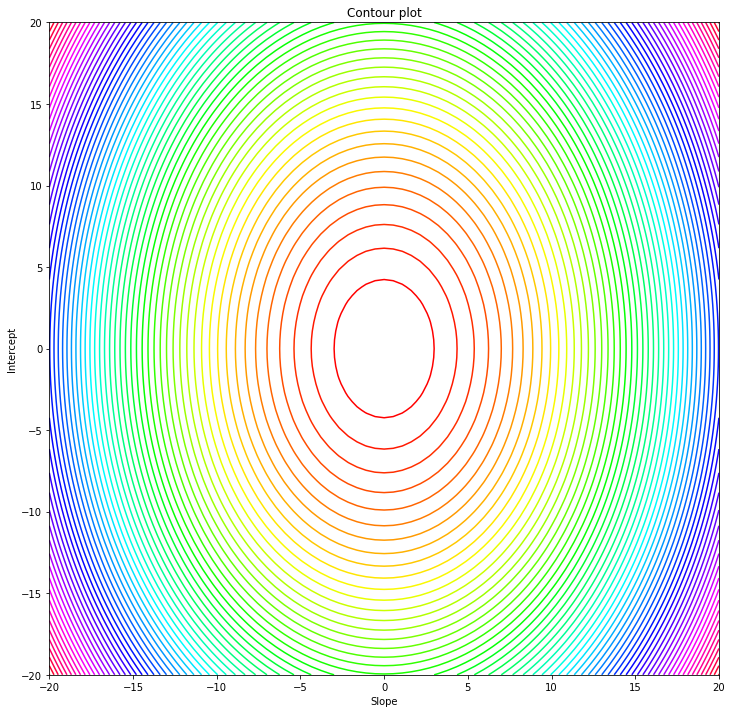

In [ ]:
fig3 = plt.figure(3,figsize=(12,12))
ctmap = fig3.add_subplot(111, facecolor='white')
ctmap.set_title("Contour plot")
ctmap.set_xlabel('Slope')
ctmap.set_ylabel('Intercept')
ctmap.contour(M, B, Z, 75, cmap=cm.hsv)
plt.show()

exiT = input( 'press any button for good bye !')